In [1]:
# For data manipulation and analysis
import pandas as pd  
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter 
import seaborn as sns  

# For splitting data into training and test sets
from sklearn.model_selection import train_test_split  

# for pipeline creation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# For model prediction
from sklearn.tree import DecisionTreeClassifier  

# For Metrics
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For evaluating classification performance
from sklearn.metrics import classification_report  # For generating a report of classification metrics

# For performance improvement 
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import log_loss  

# For skipping warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the file
data = pd.read_csv('Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# remove column 'RowNumber' , 'CustomerId' and 'Surname' - not relevant for prediction
data.drop(columns=['RowNumber' ,  'CustomerId' , 'Surname'] , axis = 1 , inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# check of duplication
data.duplicated().sum()

np.int64(0)

In [5]:
# check for empty / null / values from each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [6]:
cat_col = data.select_dtypes(include='object').columns
data[cat_col].describe()

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [9]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [10]:
num_col = data.select_dtypes(exclude='object').columns
num_col
data[num_col].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Describtion Analysis

In [11]:
data.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


* Customers have a good credit score, as shown the minimum score for credit score is 650. This means all customers are using the credit system.
* Geographically most customers are located at France. Thus the bank should give attention to these clients.
* The minimum age to have a bank account is 18, according to the data. But most of the customers are between the age of 32 to 44.
* Most of the customers are stated using the bank for 3 to 7 years ago. Also there are new customers with zero tenure. The average is 5 year.
* Half of customers are active members in the bank. Which is a warning that indicates half of clients are not active.
* 40 percent of customers churned from the bank.
* There is a high variation between customer's salary. The minimum amount is 11 and maximum 100,090.
* 20 percent in average of customer's are in complain with the bank.
* There is a good satisfaction score from the bank service. It averages is 3 which is good.
* DIAMOND card type is much preferable. It is used by 2507 customers out of the four card types.

### Analysis

#### Categorical Data Analysis

In [9]:
for column in cat_col:
    print(data[column].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


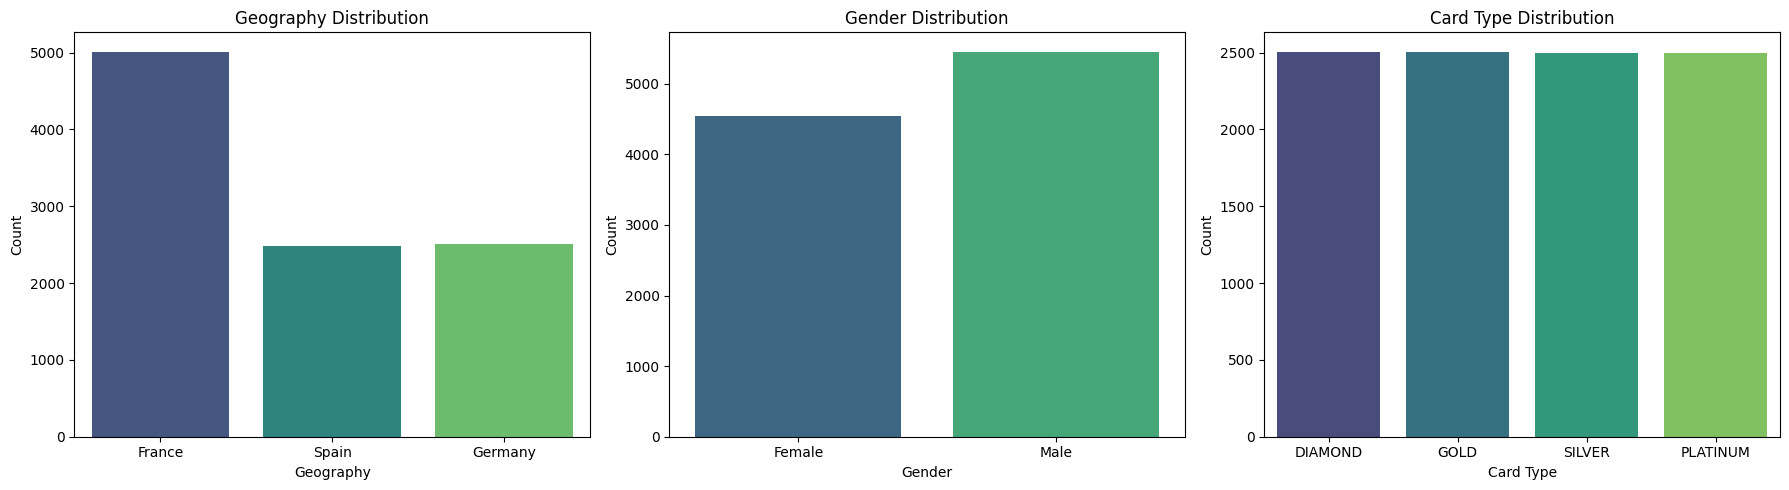

In [10]:
# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Geography
sns.countplot(ax=axes[0], x='Geography', data=data, palette='viridis')
axes[0].set_title('Geography Distribution')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')

# Plot for Gender
sns.countplot(ax=axes[1], x='Gender', data=data, palette='viridis')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot for Card Type
sns.countplot(ax=axes[2], x='Card Type', data=data, palette='viridis')
axes[2].set_title('Card Type Distribution')
axes[2].set_xlabel('Card Type')
axes[2].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


The scope of the dataset is on France, Germany and Spain coutries. Most of the data is grabbed from Germany which will take a dominance in the data. This is a sign that the bank has more french customers relative to others. The Gender distribution is equally distributed. Customer in these countries uses four types of Card type in their bank.

#### Numerical Analysis

Geography analysis

In [11]:
data.groupby('Geography')['Age']

In [12]:
age_geo = data.groupby('Geography')['Age'].mean().round(1).reset_index()
age_geo

,Geography,Age
0,France,38.5
1,Germany,39.8
2,Spain,38.9


### Univariate analysis

- Average Mean in Countries

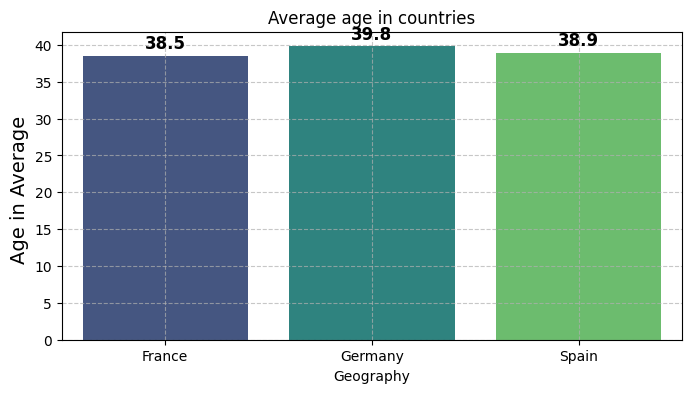

In [13]:
plt.figure(figsize=(8,4))
barplot = sns.barplot(data=age_geo,
            x='Geography',
            y="Age",
            palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points', 
                     fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Average age in countries")
plt.ylabel('Age in Average ', fontsize=14)
plt.show()

Average age is relative same for all countries.

- Number of customers leave the company

In [14]:
customer_leave = data['Exited'].value_counts().reset_index()
customer_leave['Exited'] = customer_leave['Exited'].map({1: 'Leave', 0: 'Stay'})
customer_leave

,Exited,count
0,Stay,7962
1,Leave,2038


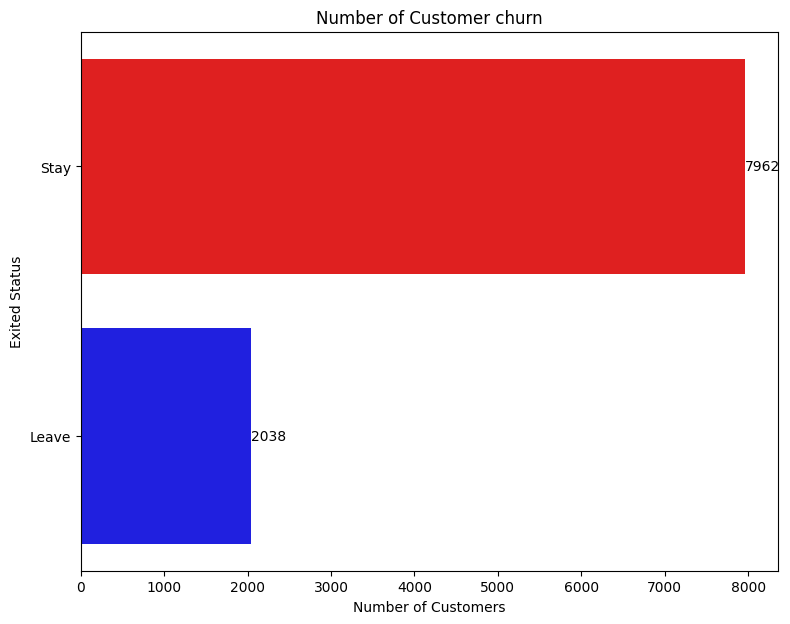

In [15]:
plt.figure(figsize=(9,7))
barplot2 = sns.barplot(data=customer_leave,
            x = "count",
            y = "Exited",
            orient='h',
            palette = ["red", "blue"]
            )
plt.title("Number of Customer churn")
plt.ylabel("Exited Status")
plt.xlabel("Number of Customers")  
for index, value in enumerate(customer_leave['count']):
    plt.text(value, index, str(value), va='center')
plt.savefig("Pictures/Number of Customer churn.jpg")
plt.show()


Most of customers are leaving from the bank.

In [16]:
geo_exit = data.groupby("Geography").sum()["Exited"].reset_index()
geo_exit

,Geography,Exited
0,France,811
1,Germany,814
2,Spain,413


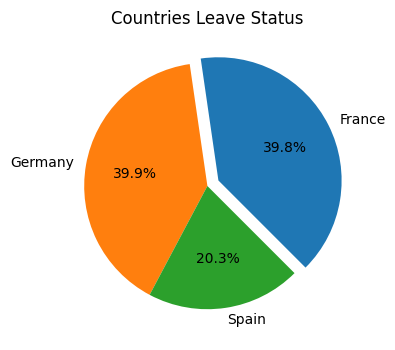

In [17]:
plt.figure(figsize=(8,4))
plt.pie(x = geo_exit["Exited"] , labels=geo_exit["Geography"] , autopct='%1.1f%%' , startangle=-45 , explode=[0.1,0,0])
plt.title("Countries Leave Status")
plt.savefig("Pictures\Countries Leave Status.jpg")
plt.show()

- Credit Score by age

In [18]:
age_credit = data.groupby("Age")["CreditScore"].sum().reset_index()
age_credit.head()

,Age,CreditScore
0,18,15107
1,19,17972
2,20,26602
3,21,34306
4,22,53470


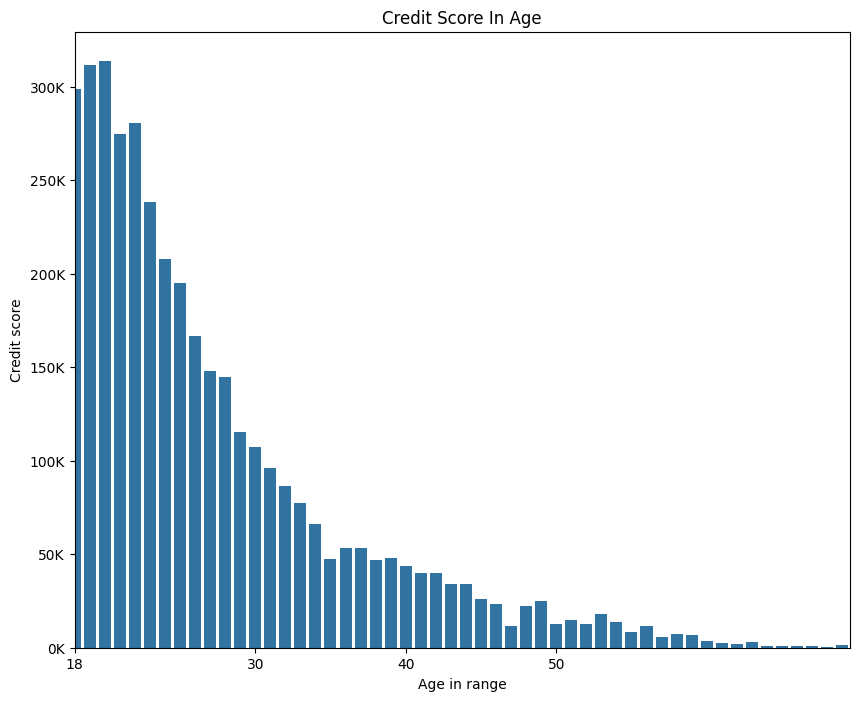

In [19]:
age_credit = age_credit.sort_values(by='Age')
plt.figure(figsize=(10,8))
sns.barplot(
    data = age_credit,
    x = "Age",
    y = "CreditScore",
) 
plt.xlim(left=age_credit['Age'].min()) 

# Define the specific tick locations and labels
tick_locations = [18, 30, 40, 50]  # Adjust based on your data range
tick_labels = ['18', '30', '40', '50']  # Labels for the ticks

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

# Set x-axis ticks at specific locations and labels
plt.xticks(ticks=tick_locations, labels=tick_labels)
plt.ylabel('Credit score')
plt.xlabel("Age in range")
plt.title("Credit Score In Age")
mean_credit_score = age_credit['CreditScore'].mean()

plt.savefig('Pictures\Credit Score In Age')
plt.show()


- Customers exits by tenure and gender

In [20]:
tenure_gender_exited = data.groupby(["Tenure" , "Gender"]).sum()["Exited"].reset_index()

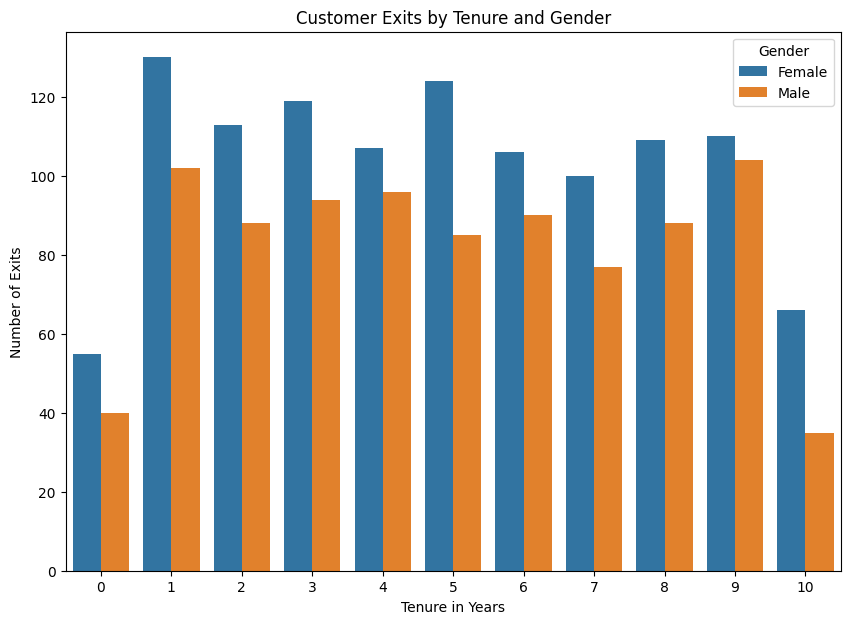

In [21]:
plt.figure(figsize=(10, 7))
barplot = sns.barplot(x='Tenure', y='Exited', hue='Gender', 
                      data=tenure_gender_exited, 
                      ci=None
                      )
plt.title('Customer Exits by Tenure and Gender')
plt.xlabel('Tenure in Years')
plt.ylabel('Number of Exits')
plt.savefig("Pictures/Customers exits by tenure and gender")
plt.show()

In [24]:
backup = data.copy()

In [19]:
X = data.drop("Exited" , axis = 1)
y = data["Exited"].copy()
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [34]:
cat_col = X.select_dtypes('object').columns

In [36]:
num_col = X.select_dtypes(exclude='object').columns

In [37]:
categorical_features = cat_col
numerical_features = num_col

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keeps the numerical columns as they are
)

In [72]:
encoded_data = preprocessor.fit_transform(X)

In [73]:
encoded_data

array([[  1.,   0.,   0., ...,   1.,   2., 464.],
       [  0.,   0.,   1., ...,   1.,   3., 456.],
       [  1.,   0.,   0., ...,   1.,   3., 377.],
       ...,
       [  1.,   0.,   0., ...,   1.,   3., 564.],
       [  0.,   1.,   0., ...,   1.,   2., 339.],
       [  1.,   0.,   0., ...,   0.,   3., 911.]])

In [74]:
# Create a DataFrame for the transformed data
# Extract feature names
feature_names = (
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)

In [75]:
list(numerical_features)

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [76]:
all_feature_names = list(feature_names) + list(numerical_features)

In [77]:
all_feature_names

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'Card Type_DIAMOND',
 'Card Type_GOLD',
 'Card Type_PLATINUM',
 'Card Type_SILVER',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [78]:
encoded_data

array([[  1.,   0.,   0., ...,   1.,   2., 464.],
       [  0.,   0.,   1., ...,   1.,   3., 456.],
       [  1.,   0.,   0., ...,   1.,   3., 377.],
       ...,
       [  1.,   0.,   0., ...,   1.,   3., 564.],
       [  0.,   1.,   0., ...,   1.,   2., 339.],
       [  1.,   0.,   0., ...,   0.,   3., 911.]])

In [129]:
X = pd.DataFrame(encoded_data, columns=all_feature_names)
X.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,2.0,464.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,3.0,456.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,3.0,377.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,5.0,350.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,5.0,425.0


### Split data

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [127]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 8000
validation samples: 2000
target proportion: 0.2056


In [131]:
X

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,2.0,464.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,3.0,456.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,3.0,377.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,5.0,350.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,5.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,1.0,300.0
9996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,5.0,771.0
9997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,3.0,564.0
9998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,2.0,339.0


# Model Training

## Decision Tree

A decision tree is a type of classification model that uses a tree-like graph of decisions and their possible consequences to make predictions. It recursively splits the dataset into subsets based on the values of input features, with each node representing a feature or attribute and each branch representing a decision rule. 

### Approach - 1

In this approach a manual hyper parameter tuning used and I am going to analyze each parameters effect on the accuracy of model. \
The hyper parameters we will use and investigate here are: 

 - min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [132]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

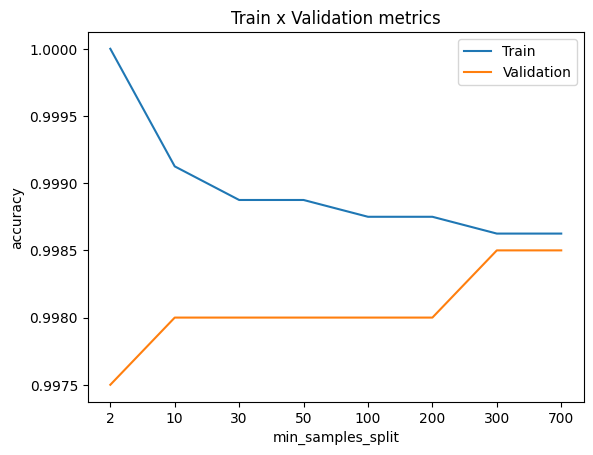

In [134]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.savefig("Pictures\min sample split.jpg")

**INSIGHT**

Note how increasing the the number of `min_samples_split` reduces overfitting.
- Increasing `min_samples_split` from 10 to 30, and from 200 to 300, even though it does not improve the validation accuracy, it brings the training accuracy closer to it, showing a reduction in overfitting.

Let's do the same experiment with `max_depth`.

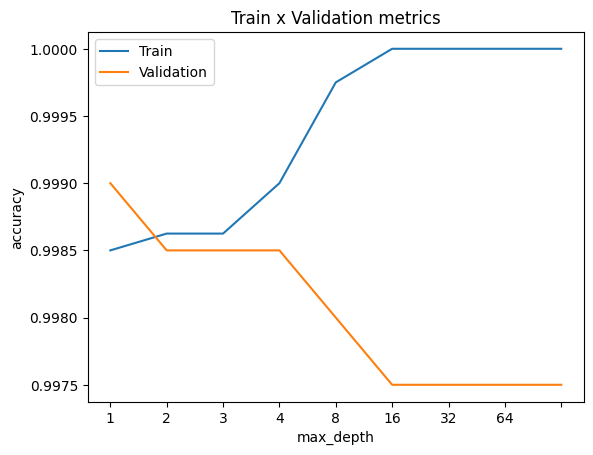

In [135]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.savefig("Pictures\max_depth.jpg")

**INSIGHT**

max depth 1 or 2
We can see that in general, reducing `max_depth` can help to reduce overfitting.
- Reducing `max_depth` from 8 to 3 and 2 to 1 increases validation accuracy closer to training accuracy, while significantly reducing training accuracy.
- The validation accuracy reaches the highest at tree_depth=1. 
- When the `max_depth` is greater than 3, both training and validation accuracy decreases, indicating that the model is overfitting to the training set. 

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 1
- `min_samples_split = 300

In [136]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 300,
                                             max_depth = 1,
                                             random_state = 42).fit(X_train,y_train)

In [137]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9985
Metrics validation:
	Accuracy score: 0.9990


#### Confusion Matrix

The confusion matrix is a table used to describe the performance of a classification model on a set of test data \
for which the true values are known. Each row of the matrix represents the instances in an actual class, while each \
column represents the instances in a predicted class.

In [92]:
y_pred = model.predict(X_val)

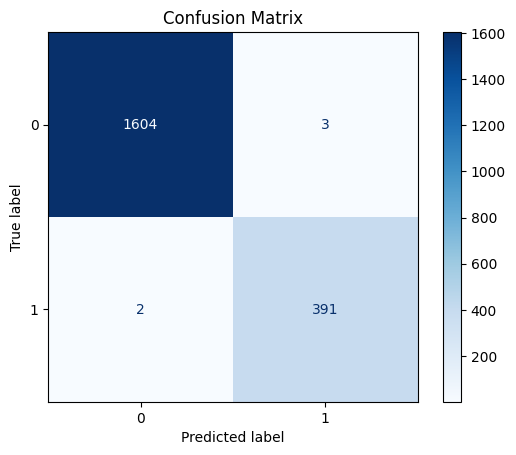

In [93]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig("Pictures\confusion matrix.jpg")
plt.show()

**INSIGHT**\
True Positive : A model predicted the class as positive\

* True Negative (TN): The number of instances correctly predicted as the negative class (0). \
* False Positive (FP): The number of instances incorrectly predicted as positive (1) when they are actually negative (0). \
* False Negative (FN): The number of instances incorrectly predicted as negative (0) when they are actually positive (1). \
* True Positive (TP): The number of instances correctly predicted as positive (1).


#### Calssification Report

A classification report is a summary of the performance of a classification model, \
providing key metrics for each class. It is especially useful for evaluating the effectiveness \
of the model and understanding how well it performs across different classes.

In [94]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



**INSIGHT - 1**

* Precision 

Precision measures the accuracy of the positive predictions. \
It is defined as the ratio of true positive predictions to the sum of true positive and false positive predictions.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mtext>Precision</mtext><mo>=</mo><mfrac><mtext>True&nbsp;Positive</mtext><mrow><mtext>True&nbsp;Positive</mtext><mo>+</mo><mtext>False&nbsp;Positive</mtext></mrow></mfrac></mrow><annotation encoding="application/x-tex">\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}} 
</annotation></semantics></math>



For class 0: Precision is 1.00, meaning all predicted class 0 instances were correctly identified.

For class 1: Precision is 0.99, meaning 99% of the predicted class 1 instances were correctly identified.

**INSIGHT - 2**

* Recall: 

Recall measures the model's ability to identify all relevant instances. \
It is the ratio of true positive predictions to the sum of true positives and false negatives.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mtext>Recall</mtext><mo>=</mo><mfrac><mtext>True&nbsp;Positive</mtext><mrow><mtext>True&nbsp;Positive</mtext><mo>+</mo><mtext>False&nbsp;Negative</mtext></mrow></mfrac></mrow><annotation encoding="application/x-tex">\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}} 
</annotation></semantics></math>

For class 0: Recall is 1.00, indicating the model successfully identified all actual class 0 instances.
For class 1: Recall is 0.99, meaning the model identified 99% of actual class 1 instances.

####  cross validation

It is a statistical technique used to evaluate the performance of a machine learning model and ensure that it generalizes well to unseen data. \
We used mini_sampless_split : 300 , and max_depth = 2

In [95]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 300,
                                             max_depth = 2,
                                             random_state = 42).fit(X_train,y_train)

cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_macro')

# Print the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation Scores: {np.std(cv_scores)}")

Cross-Validation Scores: [0.99809115 0.99713993 0.99904235 0.99428624 0.99808685]
Mean Cross-Validation Score: 0.9973293037544309
Standard Deviation of Cross-Validation Scores: 0.0016361462803191713


**INSIGHT** \
There is high accuracy 99.73% without a=overfitting the model.\
The low standard deviation (0.0016) shows that the model's performance is stable and reliable, \



## Approach - 2

The second approach is using built-in function from scikit-learn library . We are going to use GrideSearchCV.\
It is a hyperparameter tuning technique in machine learning used to find the best combination of hyperparameters for a given model. \
It helps in systematically searching through a specified subset of hyperparameters to determine which combination results in the best performance for a model.

In [96]:
# Define the parameter grid to search over
param_grid = {
    'min_samples_split': [2, 10, 50, 100, 200, 300, 500, 700],
    'max_depth': [None, 1,2, 3, 5, 10, 15, 20]
}

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


Best Parameters: {'max_depth': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.997708513863671


In [97]:
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(best_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(best_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9985
Metrics validation:
	Accuracy score: 0.9990


**Finaly** \
The model achieved 99.99% of accuracy on validation data 

#### Log loss

Log loss known as logistic loss or cross-entropy loss. It is a performance metric used to evaluate the accuracy of a classification \
model, especially for binary and multi-class classification tasks. It measures how well the predicted probabilities align with \
the actual class labels. when the log loss become to decrease, it means the model is performing a good prediction.

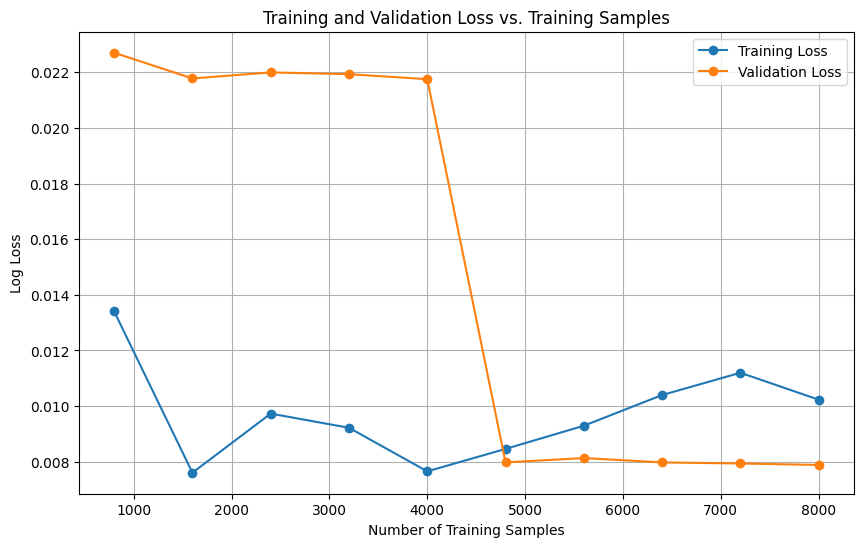

In [98]:
train_losses = []
val_losses = []
train_sizes = np.linspace(0.1, 1.0, 10)  # Define the fractions of the training data to use

for size in train_sizes:
    # Select a subset of the training data
    X_train_subset = X_train[:int(size * len(X_train))]
    y_train_subset = y_train[:int(size * len(y_train))]
    
    # Train the model on this subset
    model = best_model
    model.fit(X_train_subset, y_train_subset)
    
    # Predict probabilities for calculating log loss
    y_train_pred_prob = model.predict_proba(X_train_subset)
    y_val_pred_prob = model.predict_proba(X_val)
    
    # Calculate log loss for the training and validation sets
    train_loss = log_loss(y_train_subset, y_train_pred_prob)
    val_loss = log_loss(y_val, y_val_pred_prob)
    
    # Store the losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(X_train), train_losses, label='Training Loss', marker='o')
plt.plot(train_sizes * len(X_train), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Number of Training Samples')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss vs. Training Samples')
plt.legend()
plt.grid(True)
plt.show()

**INSIGHT**\
The above chart show log loss for training and validation loss. As the number of samples increases the training loss deacrease from 0.014 to 0.012. \
Also the validation loss decreases from 0.22 to 0.008 which is a greate generalization.

In [113]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [139]:
# Features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [140]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

In [149]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [150]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Geography', 'Gender', 'Card Type'], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [151]:
y_pred = pipeline.predict(X_val)

In [152]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy Score: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



#### save pipline

In [154]:
import pickle

# Save the pipeline to a file
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [12]:
import pickle

# Load the pipeline from the file
with open('pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [157]:
#pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [26]:
pipeline.predict(X)

array([1, 1, 1, ..., 1, 1, 0])

In [28]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339


In [23]:
X.loc[0].to_d

CreditScore                 619
Geography                France
Gender                   Female
Age                          42
Tenure                        2
Balance                     0.0
NumOfProducts                 1
HasCrCard                     1
IsActiveMember                1
EstimatedSalary       101348.88
Complain                      1
Satisfaction Score            2
Card Type               DIAMOND
Point Earned                464
Name: 0, dtype: object